In [45]:
import pandas as pd
import numpy as np
import seaborn as sb
All_data = pd.read_pickle('tfa_working_ver_1_finl.pkl')
All_data.head()

,player_rank,player,pos,age,games,games_started,min_per_game,field_goals,field_goals_attempts,field_goals_pct,...,turnovers,personal_fouls,points_per_game,year,salary,team_id,new_pos,team_points,team,team_rank
0,65,aaron brooks,PG,33,32,1,5.9,0.9,2.2,0.406,...,0.3,0.9,2.3,2018,2116955.0,MIN,back,0.573,Minnesota Timberwolves,13
1,179,aaron gordon,PF,22,58,57,32.9,6.5,14.9,0.434,...,1.8,1.9,17.6,2018,5504420.0,ORL,front,0.305,Orlando Magic,26
2,363,abdel nader,SF,24,48,1,10.9,1.0,3.1,0.336,...,0.7,0.9,3.0,2018,1167333.0,BOS,front,0.671,Boston Celtics,4
3,227,al horford,C,31,72,72,31.6,5.1,10.5,0.489,...,1.8,1.9,12.9,2018,27734405.0,BOS,front,0.671,Boston Celtics,4
4,250,al jefferson,C,33,36,1,13.4,3.1,5.8,0.534,...,0.6,1.8,7.0,2018,9769821.0,IND,front,0.585,Indiana Pacers,11


In [46]:
y=All_data.corr()
y['salary'][y['salary'] > 0.5]

games_started           0.562517
min_per_game            0.552948
field_goals             0.595762
field_goals_attempts    0.570222
2points                 0.546706
2points_attempts        0.533072
free_throws             0.564979
free_throws_attempts    0.566923
turnovers               0.500629
points_per_game         0.604180
salary                  1.000000
Name: salary, dtype: float64

In [47]:
All_data=pd.DataFrame(All_data,columns=['games_started','salary','age','games','min_per_game','field_goals','field_goals_attempts','2points','2points_attempts',
                                        'free_throws','free_throws_attempts','turnovers','points_per_game','new_pos'])
All_data.head()

,games_started,salary,age,games,min_per_game,field_goals,field_goals_attempts,2points,2points_attempts,free_throws,free_throws_attempts,turnovers,points_per_game,new_pos
0,1,2116955.0,33,32,5.9,0.9,2.2,0.5,1.2,0.3,0.3,0.3,2.3,back
1,57,5504420.0,22,58,32.9,6.5,14.9,4.5,9.0,2.7,3.9,1.8,17.6,front
2,1,1167333.0,24,48,10.9,1.0,3.1,0.6,1.8,0.5,0.8,0.7,3.0,front
3,72,27734405.0,31,72,31.6,5.1,10.5,3.8,7.3,1.3,1.7,1.8,12.9,front
4,1,9769821.0,33,36,13.4,3.1,5.8,3.1,5.7,0.8,1.0,0.6,7.0,front


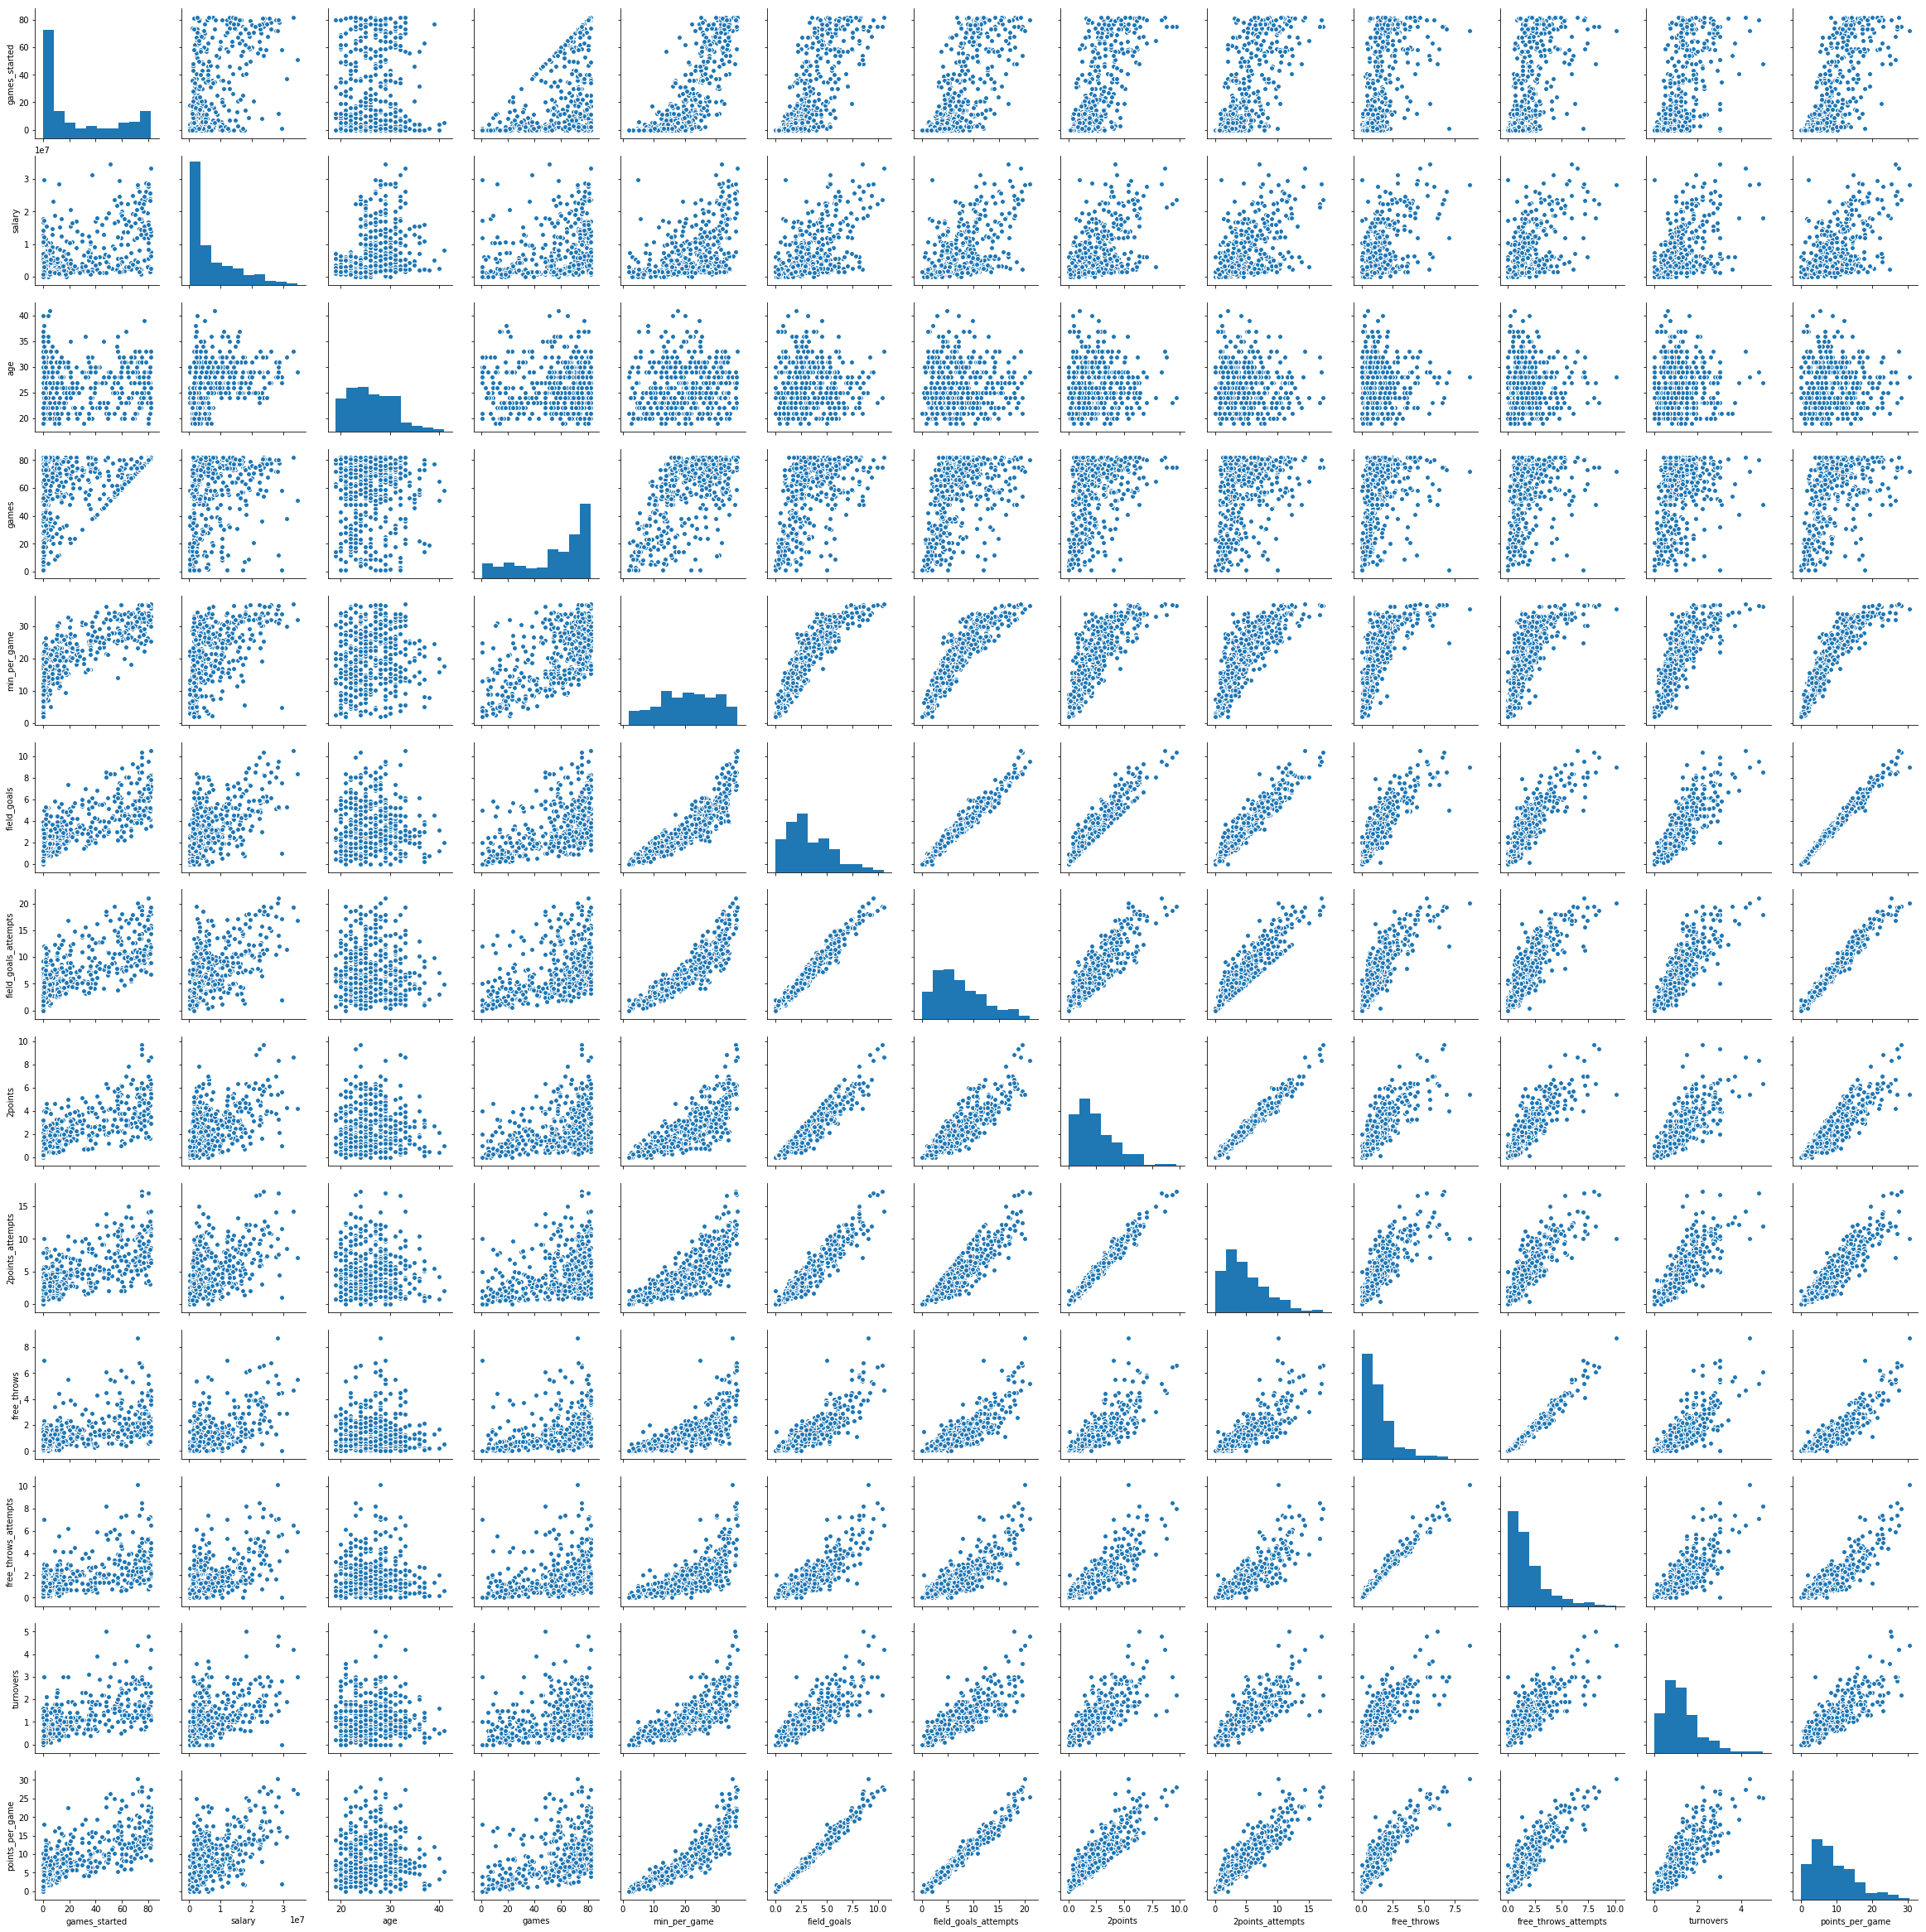

In [40]:
import seaborn as sb
sb.pairplot(All_data)

In [48]:
All_data.isnull().any()

games_started           False
salary                  False
age                     False
games                   False
min_per_game            False
field_goals             False
field_goals_attempts    False
2points                 False
2points_attempts        False
free_throws             False
free_throws_attempts    False
turnovers               False
points_per_game         False
new_pos                 False
dtype: bool

In [50]:
All_data
All_data['Position_back']=np.where((All_data['new_pos']=='back'),1,0)
All_data['Position_front']=np.where((All_data['new_pos']=='front'),1,0)
All_data[All_data['new_pos']=='special']
All_data=All_data.drop(columns=['new_pos'])
All_data[All_data==np.inf]=np.nan
All_data.fillna(method='ffill')
All_data.head()

,games_started,salary,age,games,min_per_game,field_goals,field_goals_attempts,2points,2points_attempts,free_throws,free_throws_attempts,turnovers,points_per_game,Position_back,Position_front
0,1,2116955.0,33,32,5.9,0.9,2.2,0.5,1.2,0.3,0.3,0.3,2.3,1,0
1,57,5504420.0,22,58,32.9,6.5,14.9,4.5,9.0,2.7,3.9,1.8,17.6,0,1
2,1,1167333.0,24,48,10.9,1.0,3.1,0.6,1.8,0.5,0.8,0.7,3.0,0,1
3,72,27734405.0,31,72,31.6,5.1,10.5,3.8,7.3,1.3,1.7,1.8,12.9,0,1
4,1,9769821.0,33,36,13.4,3.1,5.8,3.1,5.7,0.8,1.0,0.6,7.0,0,1


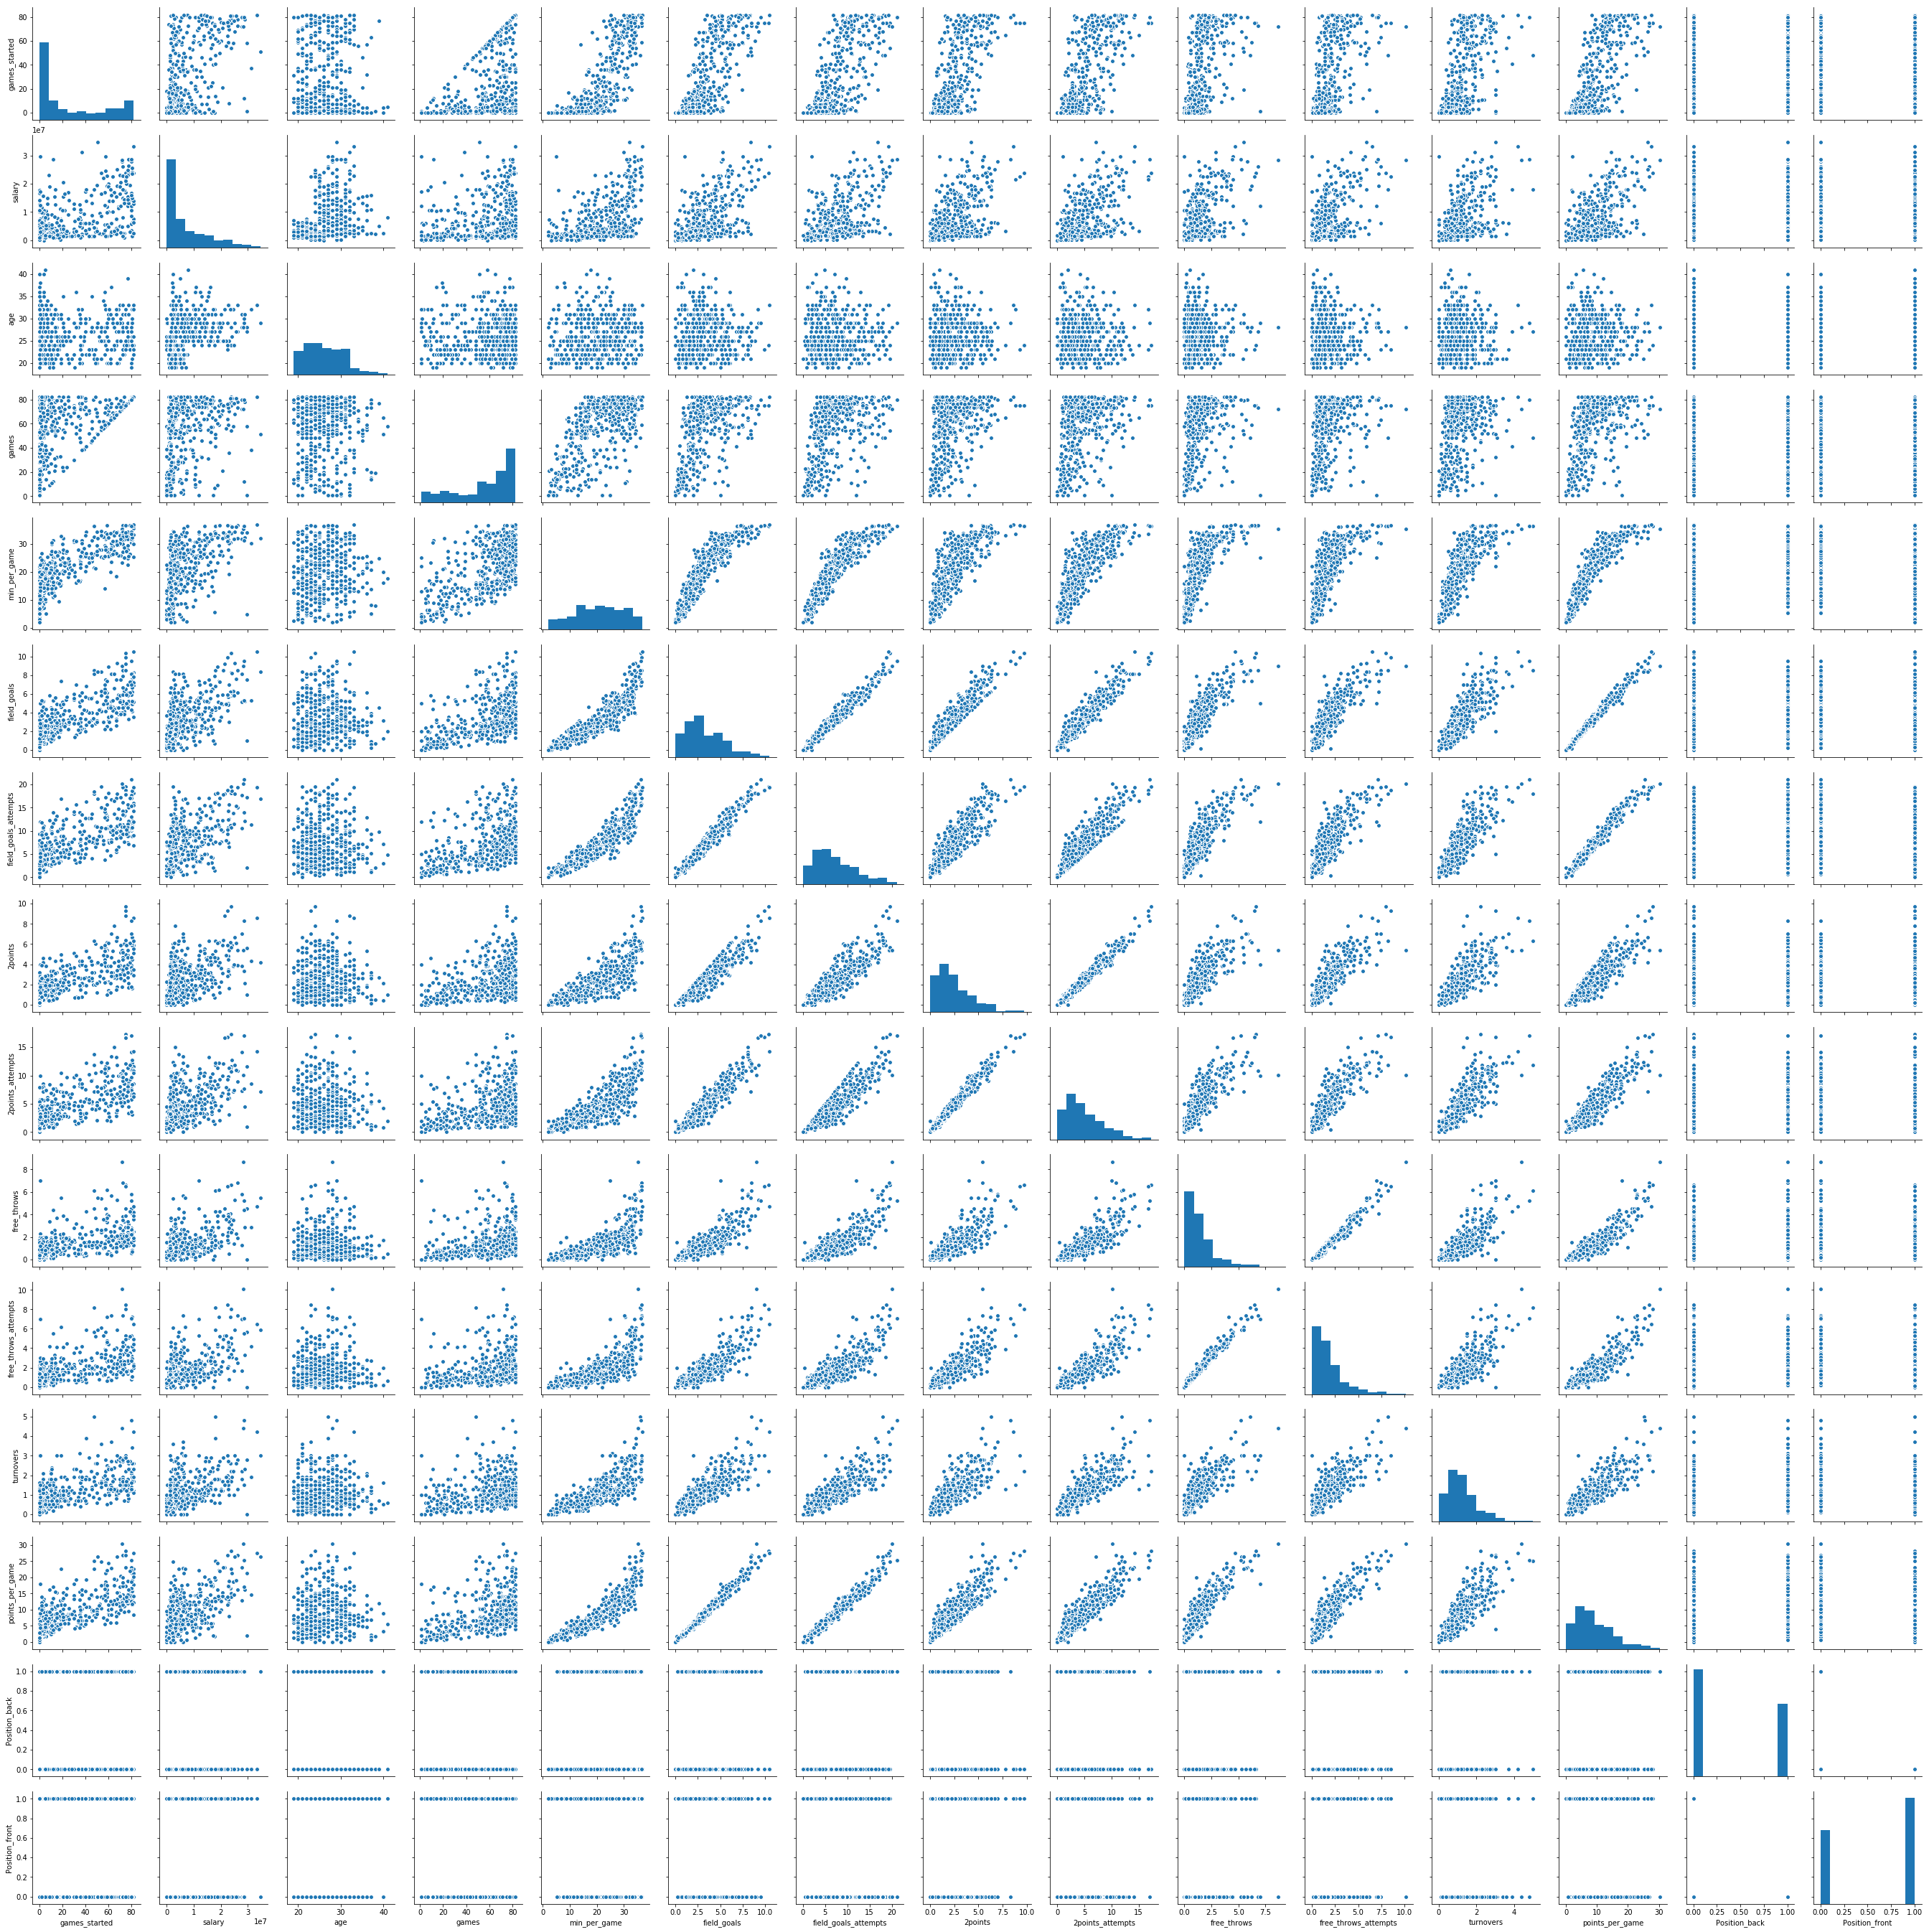

In [51]:
import seaborn as sb
sb.pairplot(All_data)

In [52]:
target=pd.DataFrame(All_data['salary'])
test=All_data.drop(columns=['salary'])
test

,games_started,age,games,min_per_game,field_goals,field_goals_attempts,2points,2points_attempts,free_throws,free_throws_attempts,turnovers,points_per_game,Position_back,Position_front
0,1,33,32,5.9,0.9,2.2,0.5,1.2,0.3,0.3,0.3,2.3,1,0
1,57,22,58,32.9,6.5,14.9,4.5,9.0,2.7,3.9,1.8,17.6,0,1
2,1,24,48,10.9,1.0,3.1,0.6,1.8,0.5,0.8,0.7,3.0,0,1
3,72,31,72,31.6,5.1,10.5,3.8,7.3,1.3,1.7,1.8,12.9,0,1
4,1,33,36,13.4,3.1,5.8,3.1,5.7,0.8,1.0,0.6,7.0,0,1
5,0,25,5,14.0,1.4,3.6,1.4,3.6,1.2,1.8,1.4,4.0,0,1
6,1,26,64,16.5,2.7,6.5,1.9,4.3,1.7,1.9,0.9,7.7,1,0
7,8,24,75,15.1,1.5,3.9,0.4,0.9,0.5,0.6,0.3,4.7,1,0
8,13,24,69,20.2,3.1,5.5,3.1,5.4,2.3,3.3,1.1,8.5,0,1
9,67,27,69,30.0,3.3,8.4,1.5,3.5,0.9,1.2,1.1,9.3,0,1


In [53]:
test.describe()

,games_started,age,games,min_per_game,field_goals,field_goals_attempts,2points,2points_attempts,free_throws,free_throws_attempts,turnovers,points_per_game,Position_back,Position_front
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.00000,449.000000,449.000000,449.000000,449.000000
mean,27.040089,26.300668,55.654788,20.738530,3.350334,7.335412,2.468597,4.880846,1.430512,1.86147,1.195323,9.009354,0.405345,0.590200
std,28.876248,4.371276,23.788010,8.948364,2.149638,4.574655,1.772828,3.379361,1.321045,1.61345,0.816242,5.977096,0.491506,0.492345
min,0.000000,19.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,39.000000,14.000000,1.700000,3.800000,1.100000,2.300000,0.500000,0.80000,0.600000,4.500000,0.000000,0.000000
50%,13.000000,26.000000,64.000000,20.700000,2.900000,6.400000,2.100000,4.100000,1.000000,1.40000,1.000000,7.700000,0.000000,1.000000
75%,56.000000,29.000000,75.000000,27.900000,4.800000,10.400000,3.400000,6.800000,1.900000,2.50000,1.600000,12.600000,1.000000,1.000000
max,82.000000,41.000000,82.000000,36.900000,10.500000,21.100000,9.700000,17.300000,8.700000,10.10000,5.000000,30.400000,1.000000,1.000000


In [54]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 1 columns):
salary    449 non-null float64
dtypes: float64(1)
memory usage: 27.0 KB


In [55]:
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
reg=linear_model.LinearRegression()

In [57]:
x_train,x_test,y_train,y_test= train_test_split(test,target,test_size=0.2,random_state=4)

In [58]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
reg.coef_

array([[   76226.80876805,   554528.82430291,   -75209.15459841,
           92774.98401451,  3954743.35081216,   906215.25462472,
         2605041.37772765, -2278894.52432431,  1695207.41488891,
         1081600.11290252,  -718141.54728721, -1592874.93574535,
         -406559.74504252,   364830.63779808]])

In [60]:
a=reg.predict(x_test)

In [61]:
a[1]

array([9757499.73972942])

In [241]:
y_test

,salary
376,2361360.0
445,3202217.0
353,2328652.0
426,13000000.0
163,950000.0
89,1312611.0
63,7630000.0
11,19332500.0
334,24773250.0
390,2422560.0


In [273]:
np.mean((a-y_test)**2).astype(int)

salary   -2147483648
dtype: int32

In [291]:
x=pd.DataFrame(a-y_test)
x['final']=x['salary']**2
np.mean(x['final'])

29764269364081.473

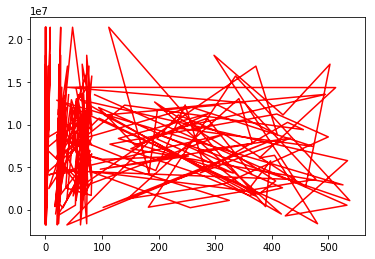

In [296]:
#plt.scatter(X, Y)
import matplotlib.pyplot as plt
plt.plot(x_test, a, color='red')
plt.show()